In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import math
#import matplotlib.patches as mppatch
import bghelperfunctions as bg
import scipy.ndimage.measurements as im_meas
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

## Data import and munging

In [2]:
df = pd.read_csv('./FormattedBGReading3.csv', 
                header=None, 
                usecols=[1,2,3,4],
                names=['datetime', 'reading1', 'reading2', 'readingtype'],
                #dtype={'datetime':str, 'reading1':np.float64, 'reading2':np.float64, 'readingtype':np.float64}
                parse_dates=['datetime']
                )
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H.%M.%S')
df['time'] = df['datetime'].dt.time
df['date'] = df['datetime'].dt.date
df['BG, mmoll-1'] = (df['reading1']/18.0).round(1)
df.set_index(df['datetime'], inplace=True)
df.head()

C:\Users\Doug\Anaconda3\lib\site-packages\pandas\core\series.py:1828: RuntimeWarning: invalid value encountered in rint
  result = com._values_from_object(self).round(decimals)


,datetime,reading1,reading2,readingtype,time,date,"BG, mmoll-1"
datetime,,,,,,,
2018-07-26 16:11:30,2018-07-26 16:11:30,103.0,103.0,5,16:11:30,2018-07-26,5.7
2018-07-26 16:10:30,2018-07-26 16:10:30,104.0,104.0,5,16:10:30,2018-07-26,5.8
2018-07-26 16:09:30,2018-07-26 16:09:30,105.0,105.0,5,16:09:30,2018-07-26,5.8
2018-07-26 16:08:30,2018-07-26 16:08:30,104.0,104.0,5,16:08:30,2018-07-26,5.8
2018-07-26 16:07:30,2018-07-26 16:07:30,103.0,103.0,5,16:07:30,2018-07-26,5.7


## Today's BGs

C:\Users\Doug\Anaconda3\lib\site-packages\pandas\core\internals.py:312: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.values[slicer]
C:\Users\Doug\Anaconda3\lib\site-packages\pandas\core\indexes\datetimelike.py:428: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getitem(key)
C:\Users\Doug\Anaconda3\lib\site-packages\pandas\core\series.py:880: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._values[indexer]


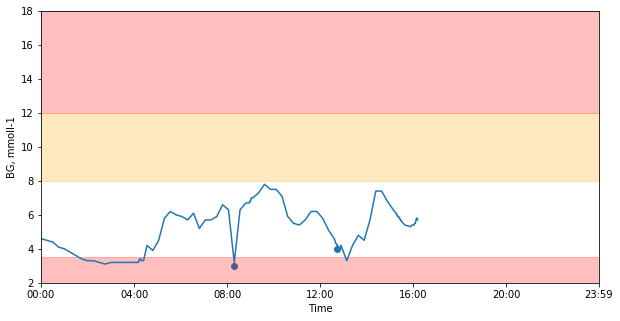

In [3]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots(1,1)
bg.plot_daily_BG(df, datetime.date.today(), ax)


## This week's BGs

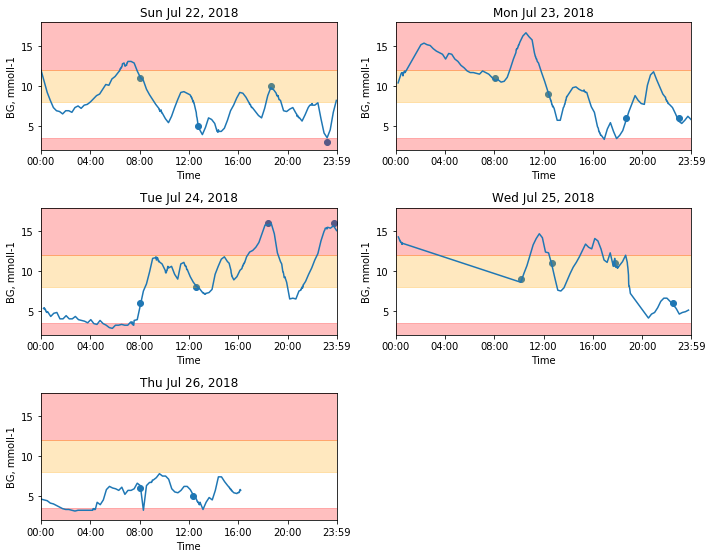

In [10]:
plt.rcParams['figure.figsize'] = [10, 10]
sunday = bg.lastWday(datetime.date.today() - datetime.timedelta(days=0), 6)
weekdays = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

fig2, ax2 = plt.subplots(4,2)
for didx in range(7):
    date = sunday + datetime.timedelta(days=didx)
    axidx = (int(math.floor(didx/2)), didx % 2)
    if date <= datetime.date.today():
        bg.plot_daily_BG(df, date, ax2[axidx])
        ax2[axidx].set_title(date.strftime("%a %b %d, %Y"))
    else:
        ax2[axidx].set_visible(False)
ax2[-1,1].set_visible(False)
plt.tight_layout()
#time_in_target(start_date, end_date)

## Monthly summary

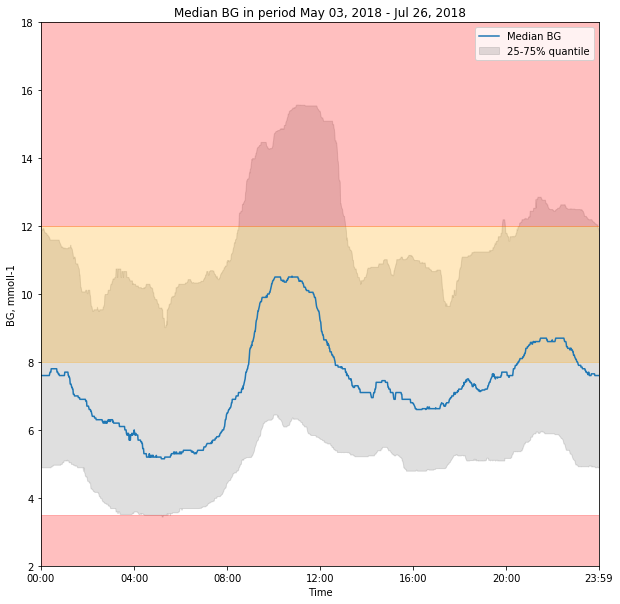

In [5]:
enddate = datetime.date.today()
startdate = datetime.date.today() - datetime.timedelta(days=28*3)
ax = bg.plot_long_term_BG(df, startdate, enddate)

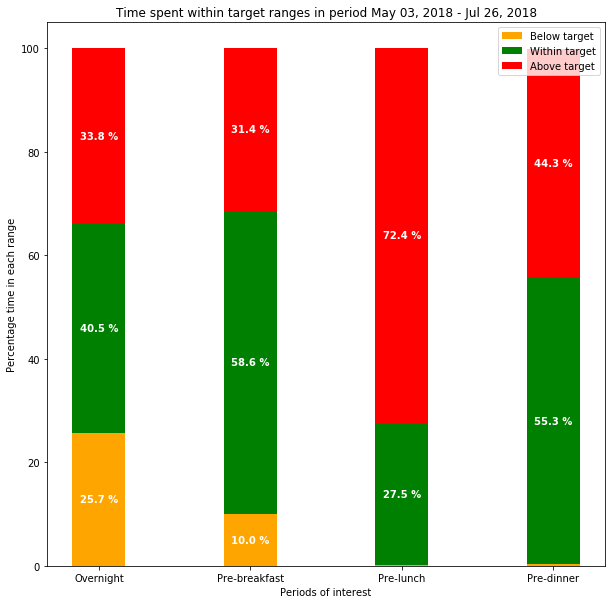

In [6]:
enddate = datetime.date.today()
startdate = datetime.date.today() - datetime.timedelta(days=28*3)
output = bg.percentageTimeInTarget(df, startdate, enddate)


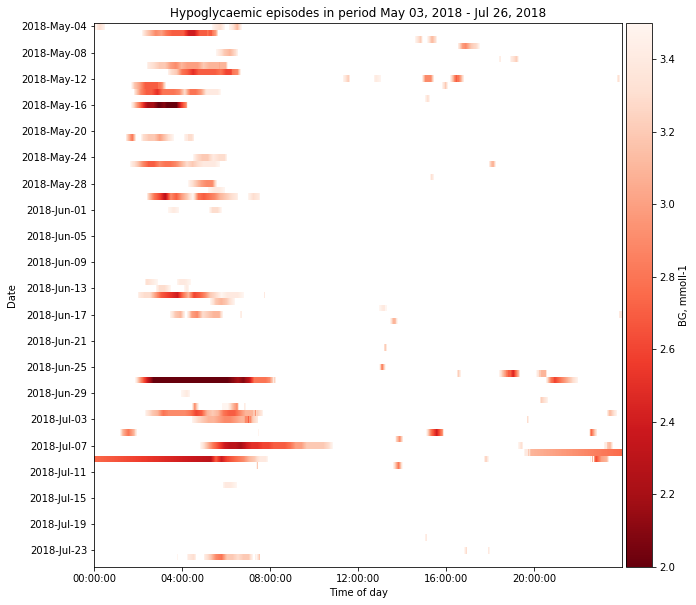

In [7]:
enddate = datetime.date.today()
startdate = datetime.date.today() - datetime.timedelta(days=28*3)
bg.plot_hypos(df, startdate, enddate)

In [8]:
enddate = datetime.date.today()
startdate = datetime.date.today() - datetime.timedelta(days=28*3)

no_days = (enddate-startdate).days
print(no_days.days)
#sample_df = df.loc[(df['date'] >= startdate) & (df['date'] <= enddate)]
#        
#t = sample_df.index
#r = pd.date_range(t.min(), t.max(), freq='30S')
#interp_df = sample_df.reindex(t.union(r)).interpolate('index')
#mask = (interp_df['BG, mmoll-1'] < 3.5).values
#print(mask.sum())
##print(mask.shape)
#lbl, nfeat = im_meas.label((mask).astype(int))
##print(lbl)
#print(nfeat)
#o = im_meas.find_objects(lbl)
#b = im_meas.find_objects(a)

#print(interp_df.iloc[o[-1][0].start : o[-1][0].stop])
#hypo_starts_t = np.asarray([interp_df.index[x[0].start].time() for x in o])

#plt.scatter(hypo_starts_t, hypo_starts_d)
#hypo_lengths = np.asarray([(interp_df.index[x[0].stop] - interp_df.index[x[0].start]).seconds for x in o])
#short_hypo_mask = np.asarray([x > 60 * 5 for x in hypo_lengths])




#print(short_hypo_mask)

#plt.scatter(hypo_starts_t[short_hypo_mask], hypo_starts_d[short_hypo_mask])
#print(type(hypo_lengths))

AttributeError: 'int' object has no attribute 'days'

In [ ]:
#enddate = datetime.date.today()
#startdate = datetime.date.today() - datetime.timedelta(days=31)
#sample_df = df.loc[(df['date'] >= startdate) & (df['date'] <= enddate)]
        
#t = sample_df.index
#r = pd.date_range(t.min(), t.max(), freq='30S')
#interp_df = sample_df.reindex(t.union(r)).interpolate('index')
#days = interp_df['date'].unique()
#days = np.unique(interp_df.index.date)
#days = days[1:-1]
#out = np.zeros((len(days), (2*60*24)))
#hypo_starts_dt = [interp_df.index[x[0].start] for x in o]

#for didx, day in enumerate(days):
#    daily_BG = interp_df.loc[interp_df.index.date == day]['BG, mmoll-1']
#    out[didx, :] = daily_BG
    
#out = np.ma.masked_where(out>3.5, out)
#fig, ax = plt.subplots(1,1)
#cbdum = ax.imshow(out, aspect='auto', cmap='Reds_r')
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(cbdum, cax=cax)

#t = [x * 4 * 2 * 60 for x in range(6)]
#d = [x * 4 for x in range(28/4)]
#t.append(2*60*24 - 1)
#ax.set_xticks(t)
#ax.set_yticks(d)
#tlbl = [datetime.time(hour= int(math.floor(tx / (2 * 60))), minute=0) for tx in t]
#dlbl = [x.strftime("%Y-%b-%d") for x in days[d]]
#nt = datetime.time(hour=23, minute=59)
#tlbl.append(nt)
#ax.set_xticklabels(tlbl)
#ax.set_xlabel("Time of day")
#ax.set_yticklabels(dlbl)
#ax.set_ylabel("Date")
#ax.set_title("Hypoglycaemic episodes")
#cax.set_ylabel("BG, mmoll-1")#

#print(daily_BG)
#for didx, day in enumerate(days):
#    print(day)
    #print(todays_hypo_starts)
#    out[didx, ]
#print(hypo_starts_dt)